# Portfolio 2

__Data driven prediction models of energy use of appliances in a low-energy house.__

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plotter
from datetime import date
import calendar
from matplotlib import pyplot as plt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# Loading Data

The first dataset is the complete data which consists all data of the energy consumption. Then we have two more datasets training and testing datasets which are the subset of the complete data. We wil train a certain set of data and test on other data to check the correctness of the model developed.

In [2]:
#Reading complete csv
complete_data = pd.read_csv('data/energydata_complete.csv',parse_dates=True)
complete_data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

## Variable description

#### date time : year-month-day hour:minute:second 
#### Appliances: energy use in Wh
#### lights: energy use of light fixtures in the house in Wh
#### T1 :  Temperature in kitchen area in Celsius
#### RH_1 :  Humidity in kitchen area in %
#### T2 :  Temperature in living room area  in Celsius
#### RH_2 :  Humidity in living room area  in %
#### T3 :  Temperature in laundry room area
#### RH_3 :  Humidity in laundry room area in %
#### T4 :  Temperature in office room in Celsius
#### RH_4 :  Humidity in office room  in %
#### T5 :  Temperature in bathroom  in Celsius
#### RH_5 :  Humidity in bathroom in %
#### T6 :  Temperature outside the building (north side) in Celsius
#### RH_6 :  Humidity outside the building (north side) in %
#### T7 :  Temperature in ironing room   in Celsius
#### RH_7 :  Humidity in ironing room  in %
#### T8 :  Temperature in teenager room 2 in Celsius
#### RH_8 :  Humidity in teenager room 2 in %
#### T9 :  Temperature in parents room   in Celsius
#### RH_9 :  Humidity in parents room   in %
#### To :  Temperature outside (from Chièvres weather station)   in Celsius
#### Pressure (from Chièvres weather station) in mm Hg
#### RH_out :  Humidity outside (from Chièvres weather station)in %
#### Windspeed (from Chièvres weather station) in m/s
#### Visibility (from Chièvres weather station) in km
#### Tdewpoint (from Chièvres weather station) °C
#### rv1 :  Random variable 1 nondimensional
#### rv2 :  Rnadom variable 2 ondimensional

# Intrepretation
Below code explains the data types used for the variables in the complete dataset.

In [3]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

# Intrepretation
Below code depicts the null values in the complete dataset.

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

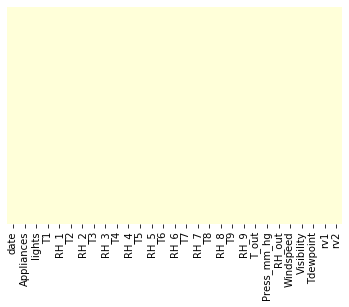

In [4]:
sns.heatmap(complete_data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')
complete_data.isnull().sum()

# Intrepretation
Below code depicts the statistics values for the given dataset such as mean, std, many more.

In [5]:
complete_data.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

# Ananlysis
Complete dataset is divided into training and testing data to perform analysis.

In [6]:
#Reading testing data
test_data = pd.read_csv('data/energydata_testing.csv', index_col='date', parse_dates=True)
test_data.head()

Appliances  lights         T1       RH_1         T2  \
date                                                                       
2016-01-11 17:30:00          50      40  19.890000  46.066667  19.200000   
2016-01-11 18:00:00          60      50  19.890000  45.766667  19.200000   
2016-01-11 18:40:00         230      70  19.926667  45.863333  19.356667   
2016-01-11 18:50:00         580      60  20.066667  46.396667  19.426667   
2016-01-11 19:30:00         100      10  20.566667  53.893333  20.033333   

                          RH_2     T3       RH_3     T4       RH_4  ...  \
date                                                                ...   
2016-01-11 17:30:00  44.590000  19.79  45.000000  18.89  45.723333  ...   
2016-01-11 18:00:00  44.500000  19.79  44.900000  18.89  45.790000  ...   
2016-01-11 18:40:00  44.400000  19.79  44.900000  18.89  46.430000  ...   
2016-01-11 18:50:00  44.400000  19.79  44.826667  19.00  46.430000  ...   
2016-01-11 19:30:00  46.756667  20.10  48.466667  19.00  48.490000  ...   

                     Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
date                                                                            
2016-01-11 17:30:00   733.800000  92.000000   6.000000        51.5   5.000000   
2016-01-11 18:00:00   734.100000  92.000000   5.000000        40.0   4.700000   
2016-01-11 18:40:00   734.366667  91.333333   5.666667        40.0   4.633333   
2016-01-11 18:50:00   734.433333  91.166667   5.833333        40.0   4.616667   
2016-01-11 19:30:00   734.850000  89.500000   6.000000        40.0   4.350000   

                           rv1        rv2    NSM  WeekStatus  Day_of_week  
date                                                                       
2016-01-11 17:30:00  45.410389  45.410389  63000     Weekday       Monday  
2016-01-11 18:00:00  47.233763  47.233763  64800     Weekday       Monday  
2016-01-11 18:40:00  10.298729  10.298729  67200     Weekday       Monday  
2016-01-11 18:50:00   8.827838   8.827838  67800     Weekday       Monday  
2016-01-11 19:30:00  24.884962  24.884962  70200     Weekday       Monday  

[5 rows x 31 columns]

In [7]:
#Reading training data
train_data = pd.read_csv('data/energydata_training.csv', index_col='date', parse_dates=True)
train_data.head()

Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
2016-01-11 17:50:00          50      40  19.89  46.026667  19.2  44.500000   

                        T3       RH_3         T4       RH_4  ...  Press_mm_hg  \
date                                                         ...                
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667  ...        733.5   
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500  ...        733.6   
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000  ...        733.7   
2016-01-11 17:40:00  19.79  45.000000  18.890000  45.530000  ...        733.9   
2016-01-11 17:50:00  19.79  44.933333  18.890000  45.730000  ...        734.0   

                     RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
date                                                                       
2016-01-11 17:00:00    92.0   7.000000   63.000000        5.3  13.275433   
2016-01-11 17:10:00    92.0   6.666667   59.166667        5.2  18.606195   
2016-01-11 17:20:00    92.0   6.333333   55.333333        5.1  28.642668   
2016-01-11 17:40:00    92.0   5.666667   47.666667        4.9  10.084097   
2016-01-11 17:50:00    92.0   5.333333   43.833333        4.8  44.919484   

                           rv2    NSM  WeekStatus  Day_of_week  
date                                                            
2016-01-11 17:00:00  13.275433  61200     Weekday       Monday  
2016-01-11 17:10:00  18.606195  61800     Weekday       Monday  
2016-01-11 17:20:00  28.642668  62400     Weekday       Monday  
2016-01-11 17:40:00  10.084097  63600     Weekday       Monday  
2016-01-11 17:50:00  44.919484  64200     Weekday       Monday  

[5 rows x 31 columns]

# Intrepretation

data tyep of date column of the complete dataset is changed to datetime for plotting in the line graph.

In [8]:
complete_data["date"]=pd.to_datetime(complete_data["date"])
date_appliances_data=complete_data[["date","Appliances"]]

# Intrpretation

Below code illustrates the line graph for the appliances column over the whole data and for just 1week ( 1008 rows are fetched from the complete dataset).

In [9]:
date_appliances_data.plot(kind='line',x='date', y='Appliances',color='brown')
plt.xlabel("Time")
plt.ylabel("Appliances Wh")
plt.subplots_adjust(right=3)

#1st week data
date_appliances_data[1:1008].plot(kind='line',x='date', y='Appliances',color='grey')
plt.xlabel("Time 1 week")
plt.ylabel("Appliances Wh")
plt.subplots_adjust(right=3)

# Intrepretation
There are two line graphs plotted, one is depicting the whole data between appliances and date. Whereas, second graph illustrates one week usage of appliances. Highest amount of energy consumed between 15th and 16th of January.

In [10]:
#date_appliances_data1=date_appliances_data["Appliances"]
date_appliances_data['Appliances'].plot.hist(bins=40,grid=True,color='green') 
plt.subplots_adjust(right=2)
plt.xlim([0,1200])
#plt.xlim(min(edges), max(edges))
plt.xlabel("Appliances Wh")
plt.ylim(0,10000)
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

# Intrepretation

Distribution of appliances is not normal, it is right skewed distribution as tail is titled towards the right.

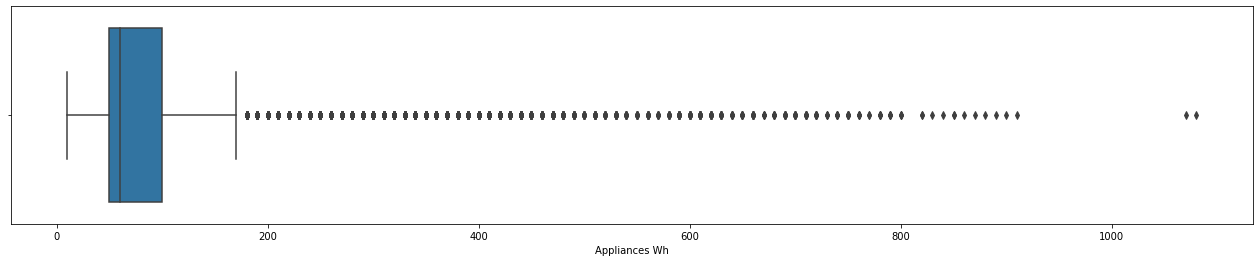

In [11]:
ax = sns.boxplot(x=date_appliances_data["Appliances"])
plt.xlabel("Appliances Wh")
plt.subplots_adjust(right=3)
plt.show()

# Intrepretation 
As the above boxplot depicts there are many outliers in the data, it means there are plenty of values are outside of the range.

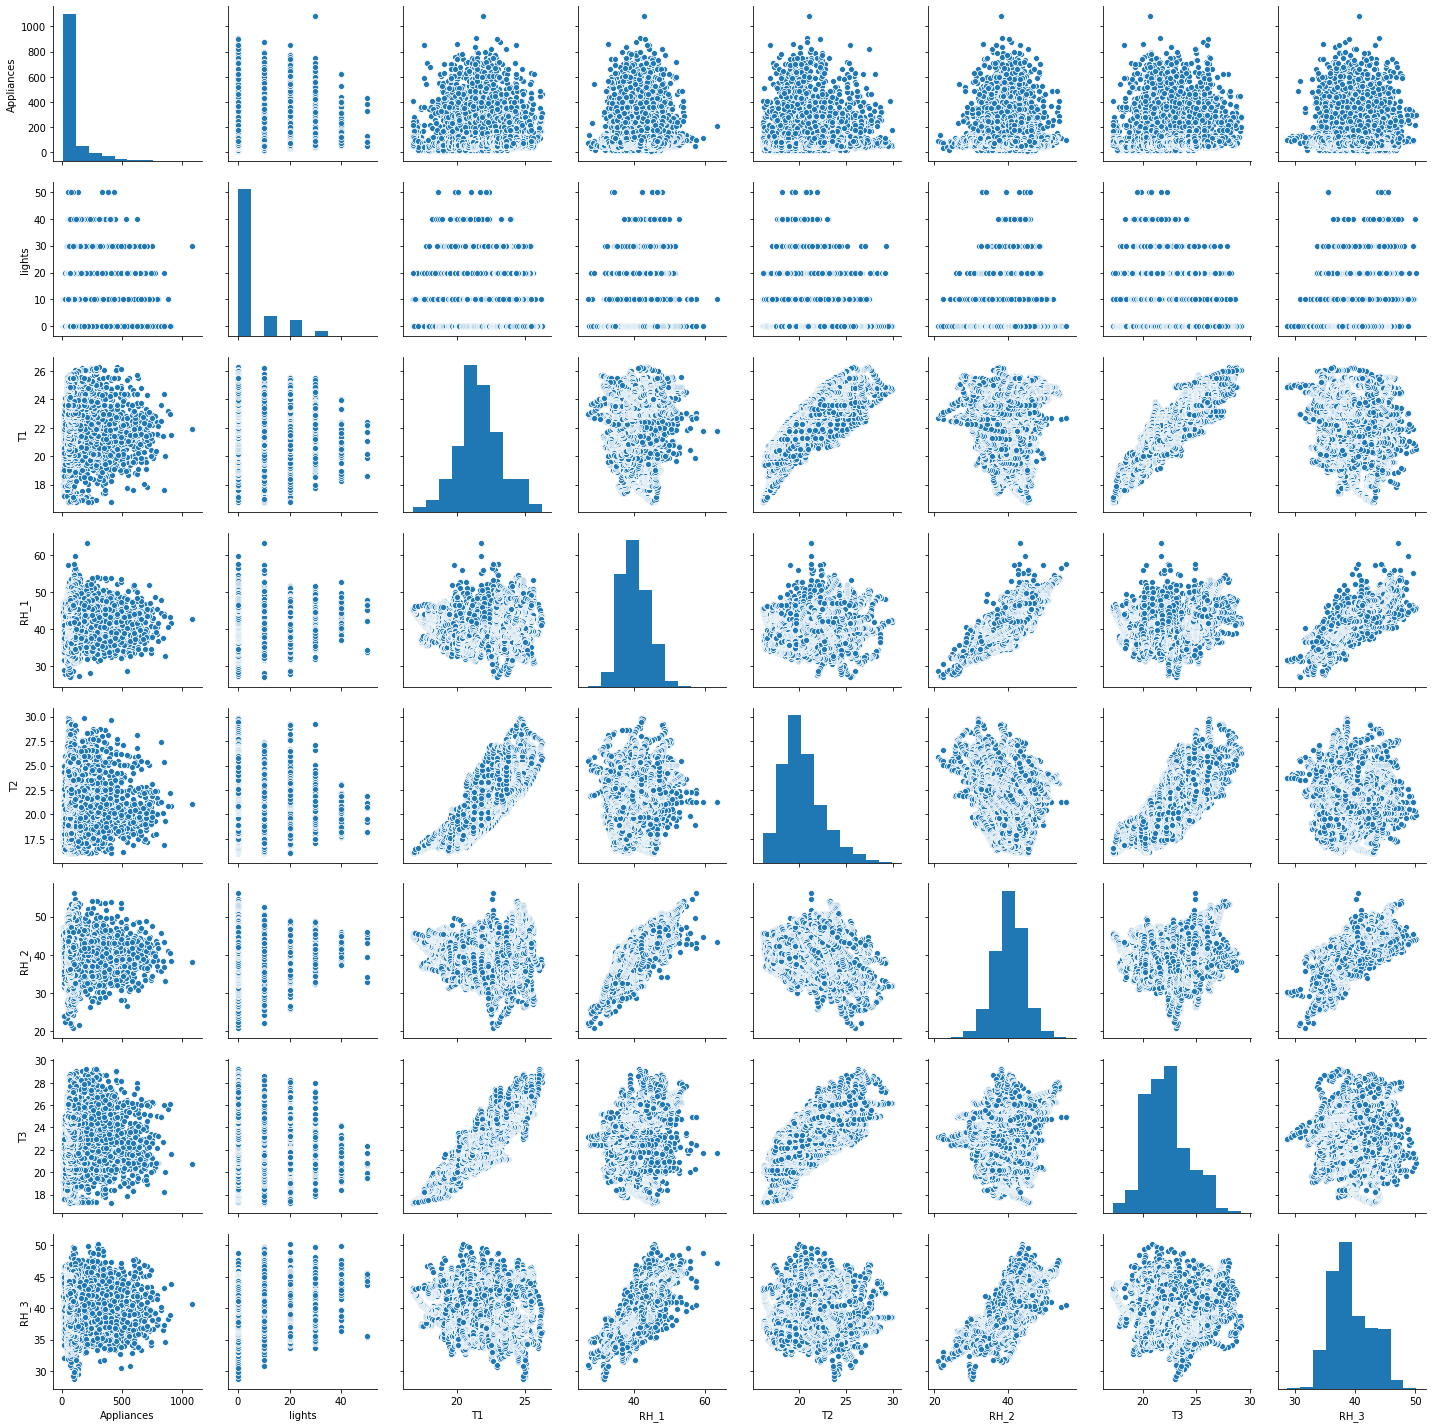

In [12]:
train_data_corr =train_data [["Appliances", "lights","T1","RH_1","T2","RH_2","T3","RH_3"]]
sns.pairplot(train_data_corr)

In [13]:
train_data_corr1=train_data_corr.corr()
def color_negative_red(value):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if value < 0 else 'black'
    return 'color: %s' % color

train_data_corr1.style.applymap(color_negative_red)

# negative values are highlighted

# Intrepretation

Pairplot shows the correlation between various variables and to make it more understandable , correlation values are also calculated. This shows negative values in the red and other are in black. Red value means low correlation and black one depicts strong corelation.

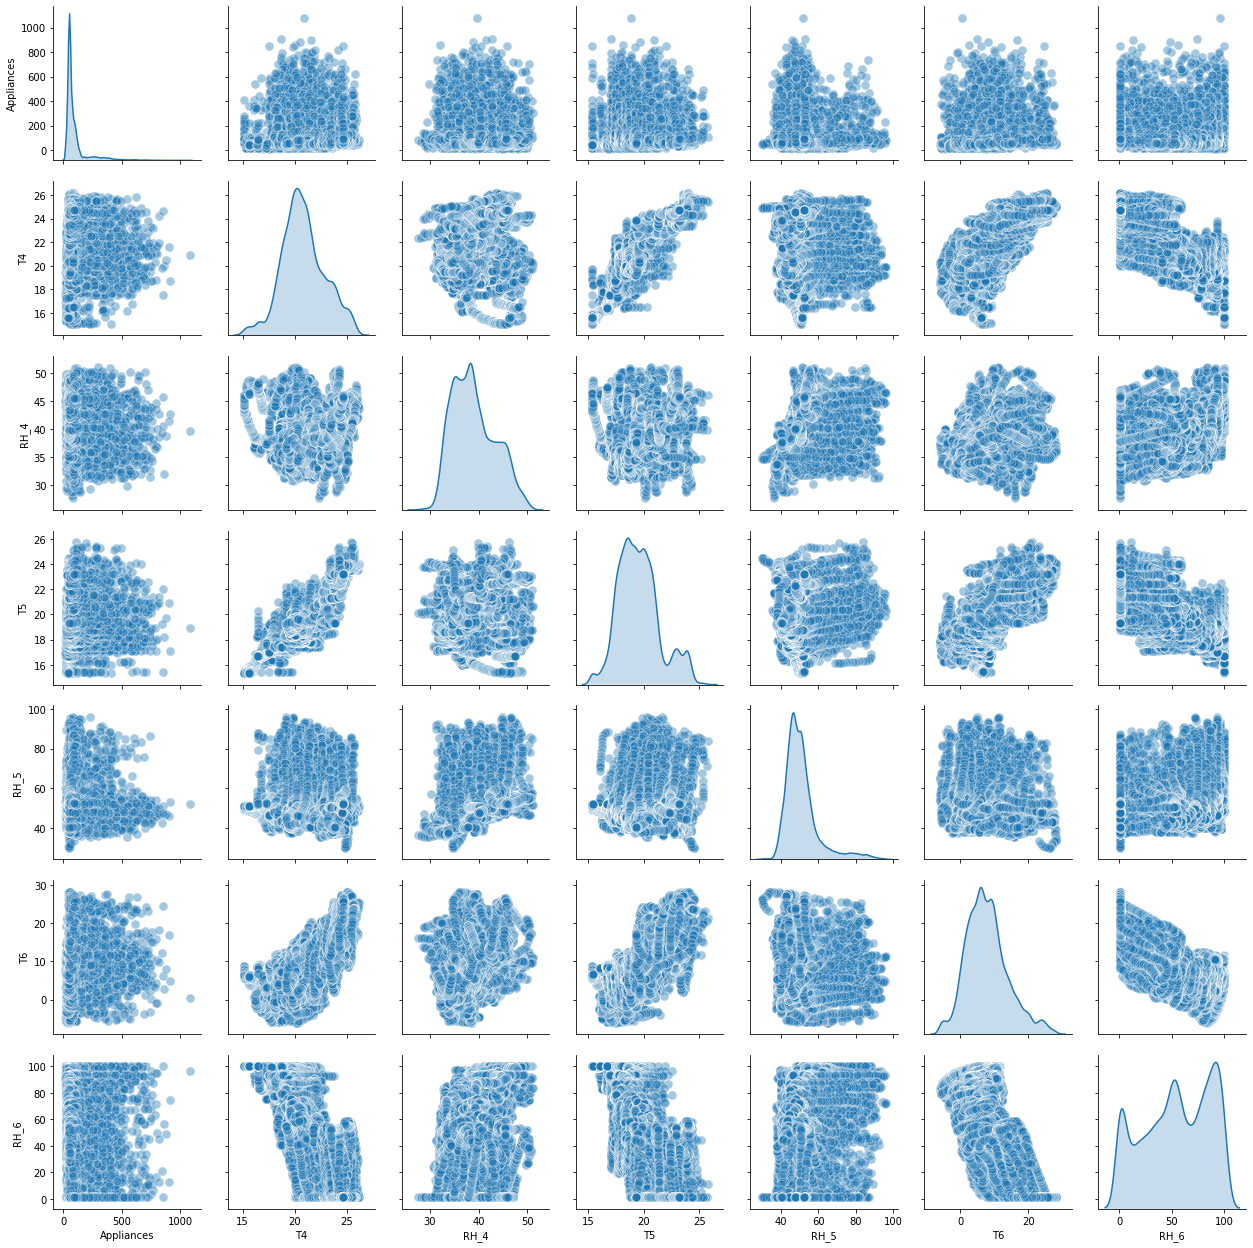

In [14]:
train_data_corr2 =train_data [["Appliances", "T4", "RH_4","T5", "RH_5", "T6", "RH_6"]]
sns.pairplot(train_data_corr2,diag_kind = 'kde',plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'w'})

In [15]:
train_data_corr3=train_data_corr2.corr()
train_data_corr3.style.applymap(color_negative_red)

# Intrepretation

Pairplot shows the correlation between various variables and to make it more understandable , correlation values are also calculated. This shows negative values in the red and other are in black. Red value means low correlation and black one depicts strong corelation, T4 has low correlation with __RH_4__ , __RH_5__ and __RH_6__ where __Appliances__ has low correlation with __RH_6__.

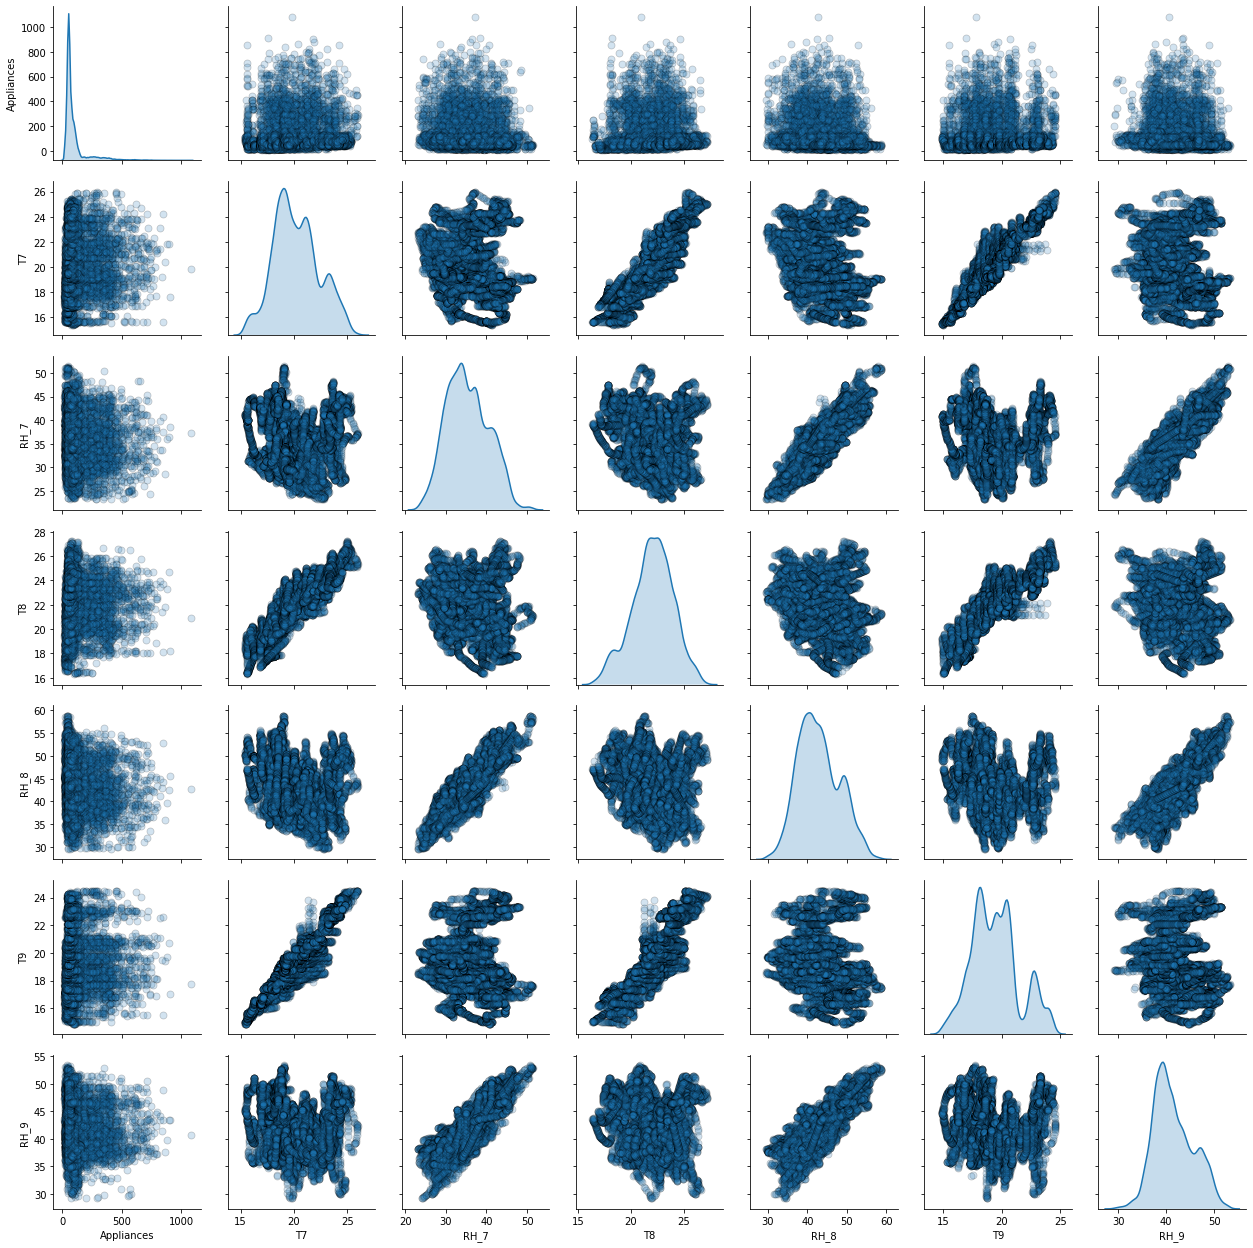

In [16]:
train_data_corr4 =train_data [["Appliances", "T7", "RH_7","T8", "RH_8", "T9","RH_9"]]
sns.pairplot(train_data_corr4,diag_kind = 'kde',plot_kws = {'alpha': 0.2, 's': 50, 'edgecolor': 'k'})

In [17]:
train_data_corr5=train_data_corr4.corr()
train_data_corr5.style.applymap(color_negative_red)

# Intrepretation

Pairplot shows the correlation between various variables and to make it more understandable , correlation values are also calculated. This shows negative values in the red and other are in black. Red value means low correlation and black one depicts strong corelation, T7 has low correlation with __RH_7__ , __RH_8__ and __RH_9__ where __Appliances__ has low correlation with __RH_7__ , __RH_8__ , __RH_9__.

In [ ]:
train_data_corr6 =train_data [["Appliances", "T_out", "Press_mm_hg", "RH_out", "Windspeed","Visibility", "Tdewpoint", "NSM","T6"]]
sns.pairplot(train_data_corr6,diag_kind = 'kde',plot_kws = {'alpha': 0.2, 's': 100, 'edgecolor': 'k'})


In [ ]:
train_data_corr7=train_data_corr6.corr()
train_data_corr7.style.applymap(color_negative_red)

# Intrepretation
Above plot shows correlation matrix between all the variables of the training data.

In [ ]:
#new_dataset=complete_data[["date",sum("Appliances")]]
new_dataset = complete_data.groupby("Appliances").sum()
new_dataset.head()

In [ ]:
complete_data["date"]=pd.to_datetime(complete_data["date"])

In [ ]:
complete_data['day_name'] = complete_data['date'].dt.weekday_name;
complete_data['hour'] = complete_data['date'].dt.hour;

In [ ]:
# Splitting the dataframe based on months.
Fmon = complete_data.loc[(complete_data.date >= '2016-01-01') & (complete_data.date <= '2016-01-28')]
Smon = complete_data.loc[(complete_data.date >= '2016-02-01') & (complete_data.date <= '2016-02-28')]
Tmon = complete_data.loc[(complete_data.date >= '2016-03-01') & (complete_data.date <= '2016-03-28')]
Fmon = complete_data.loc[(complete_data.date >= '2016-04-01') & (complete_data.date <= '2016-04-28')]

In [ ]:
# Making a pivot table with day name and hour over appliances.
Firstmonthv2 = pd.pivot_table(Fmon[['day_name','hour','Appliances']],index=['day_name','hour'],aggfunc='sum')
Secondmonthv2 = pd.pivot_table(Smon[['day_name','hour','Appliances']],index=['day_name','hour'],aggfunc='sum')
Thirdmonthv2 = pd.pivot_table(Tmon[['day_name','hour','Appliances']],index=['day_name','hour'],aggfunc='sum')
Fourthmonthv2 = pd.pivot_table(Fmon[['day_name','hour','Appliances']],index=['day_name','hour'],aggfunc='sum')

In [ ]:
# Unstacking the Dataframes.
Firstmonthv3 = Firstmonthv2.unstack(level=0)
Secondmonthv3 = Secondmonthv2.unstack(level=0)
Thirdmonthv3 = Thirdmonthv2.unstack(level=0)
Fourthmonthv3 = Fourthmonthv2.unstack(level=0)

In [ ]:
# Reindexing the labels in order.
Firstmonthv3 = Firstmonthv3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)
Secondmonthv3 = Secondmonthv3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)
Thirdmonthv3 = Thirdmonthv3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)
Fourthmonthv3 = Fourthmonthv3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)

In [ ]:
# Giving week days their short form for easy and presentabe way.

day_short_names = ['Sun','Mon','Tues','Wed','Thurs','Fri','Sat']

# First Month Heatmap

In [ ]:
f,ax =plt.subplots(figsize=(5,15))
ax=sns.heatmap(Firstmonthv3,cmap="YlGnBu",linewidths=.5, xticklabels=day_short_names)
ax.set(xlabel = 'Day of the Week',ylabel='Hour of Day')

# Second Month Heatmap

In [ ]:
f,bx =plt.subplots(figsize=(5,15))
bx=sns.heatmap(Secondmonthv3, cmap="BuPu",linewidths=.5, xticklabels=day_short_names)
bx.set(xlabel = 'Day of the Week',ylabel='Hour of Day')

# Third Month Heatmap

In [ ]:
f,cx =plt.subplots(figsize=(5,15))
cx=sns.heatmap(Thirdmonthv3,cmap="Greens",linewidths=.5, xticklabels=day_short_names)
cx.set(xlabel = 'Day of the Week',ylabel='Hour of Day')

# Fourth Month Heatmap

In [ ]:
f,dx =plt.subplots(figsize=(5,15))
dx=sns.heatmap(Fourthmonthv3,cmap="YlGnBu",linewidths=.5, xticklabels=day_short_names)
dx.set(xlabel = 'Day of the Week',ylabel='Hour of Day')

In [ ]:
complete_data.columns

In [ ]:
X = complete_data[['Appliances']]
y = complete_data['Tdewpoint']

# Intrepretation
__Linear model__ is developed.

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

In [ ]:
coeff_df = pd.DataFrame(reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [ ]:
y_pred=(X.iloc[90,:])* [0.00062814] + 3.699340290436687
print("y Predicted:", y_pred)
print("y actual:", y[90])

In [ ]:
predicted = reg.predict(X)
mse_mpg = ((np.array(y)-predicted)**2).sum()/len(y)
r_mpg = r2_score(y, predicted)
print("MSE:", mse_mpg)
print("R Squared:", r_mpg)

# Intrepretation
MSE : A larger MSE means that the data values are dispersed widely around its central moment (mean).

R2 square :is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.